# Priprema podataka u Pythonu

Cilj pripreme podataka je višestruk i može se odnositi na dobijanje relevantnijeg skupa podataka (ponekad i na račun smanjene tačnosti predviđanja), poboljšanja performansi samog procesa učenja, kao i poboljšanje tačnosti modela.

Priprema podataka obuhvata sledeće operacije nad skupom podataka:
- Čišćenje podataka, odnosno definisanje tipova, rešavanje problema neispravnih formata
- Tretman nedostajućih vrednosti
- Tretman outliera
- Transformacija zakošenih veličina (vrši se samo ukoliko se planira korišćenje algoritama koji podrazumevaju normalnu raspodelu)
- Kreiranje polinomijalnih veličina (vrši se samo ukoliko se planira korišćenje parametarskih algoritama)
- Klasterovanje i binarizacija (kao specijalan slučaj klasterovanja) - transformacija kontinualne u veličinu tipa kategorija
- Skaliranje (normalizacija ili standardizacija)
- Kodiranje podataka

U demonstraciji pripreme podataka u Pythonu, koristi se skup podataka za predviđanje dijabetesa.

In [1]:
import pandas as pd
df=pd.read_csv('kurs_diabetes.csv', names=['preg','plas','pres','skin','insu','mass','pedi','age','class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
insu     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


## Čišćenje podataka

Ranije je, analizom podataka (što se jasno vidi na histogramima) utvrđeno da su u skupu podataka za utvrđivanje dijabetesa nedostajući podaci zamenjeni brojem 0. Zato, izvršenjem metode info() DataFrame objekta, njihovo postojanje nije utvrđeno.

In [2]:
from matplotlib import pyplot as plt
df.hist()
plt.show()

<Figure size 640x480 with 9 Axes>

Dole navedeni niz komandi vrši zamenu pojavljivanja 0 u svim numeričkim veličinama (osim pedi i age, za koje ne postoji vrednost 0) sa nedostajućom vrednosti. Zamena pojavljivanja 0 se vrši korišćenjem već prikazane metode manipulacije podskupa postojećih podataka, korišćenjem loc metode DataFrame objekta.

In [3]:
import numpy as np
df.loc[df['insu']==0,'insu']=np.nan
df.loc[df['mass']==0,'mass']=np.nan
df.loc[df['plas']==0,'plas']=np.nan
df.loc[df['preg']==0,'preg']=np.nan
df.loc[df['pres']==0,'pres']=np.nan
df.loc[df['skin']==0,'skin']=np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     657 non-null float64
plas     763 non-null float64
pres     733 non-null float64
skin     541 non-null float64
insu     394 non-null float64
mass     757 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 54.1+ KB


## Tretman nedostajućih vrednosti

Fenomen nedostajućih podataka određenih veličina u skupovima podataka je sveprisutan i veoma često se uočava. Postoji veliki broj mogućih razloga za nedostajuće podatke i uobičajeno su oni nepoznati. Mogući razlozi mogu da budu ljudske greške prilikom unosa podataka, neispravnost senzora za akviziciju podataka, softverski bagovi u sistemima za akviziciju podataka, i dr.

Dve osnovne strategije za tretman nedostajućih vrednosti su:
- Uklanjanje podataka i
- Imputacija

Pod uklanjanjem podataka, podrazumeva se jedno od dva moguća rešenja:
- Uklanjanje instanci u kojima nedostaje podatak neke veličine
- Uklanjanje veličina čiji podaci nedostaju

Oba ova rešenja vezana za uklanjanje podataka se retko primenjuju. Ne postoje konkretne preporuke koje mogu ukazati na slučajeve u kojima ih je moguće primeniti. Generalno, ukoliko za neku veličinu imamo manje od 10% nedostajućih podataka, potrebno je razmotriti uklanjanje instanci; ukoliko za neku veličinu imamo više od 50% nedostajućih podataka, potrebno je razmotriti uklanjanje te veličine.

### Imputacija podataka

Imputacija podataka podrazumeva zamenu nedostajućih podataka neke veličine novim vrednostima, koje se smatraju statistički značajnim. Ove nove vrednosti mogu da budu:
- Srednja vrednost postojećih podataka numeričke veličine
- Medijana ili mod postojećih podataka numeričke veličine (koristi se u slučajevima u kojima ima mnogo outliera)
- Kategorija sa najvećom frekvencijom pojavljivanja među postojećim podacima veličine tipa kategorija ili medijana (nominalni tip)
- Kategorija nedostajućih podataka - nova vrednost veličina tipa kategorija (ordinalni tip)

S obzirom na veliki broj nedostajućih podataka veličine insu, očigledno je da bi se od algoritma predviđanja očekivali bolji rezultati ukoliko se ona u potpunosti ukloni iz skupa podataka za učenje, odnosno kao ulazna veličina za predviđanje.

In [4]:
df=df.drop('insu',1)

Imputacija statistički važnih vrednosti se vrši primenom metode manipulacije podskupom podataka iz DataFrame objekta. Dole navedeni kod vrši imputaciju medijane umesto nedostajućih vrednosti u veličinama preg, plas i mass.

In [5]:
df.loc[np.isnan(df['preg']),'preg']=df['preg'].median()
df.loc[np.isnan(df['plas']),'plas']=df['plas'].median()
df.loc[np.isnan(df['mass']),'mass']=df['mass'].median()

Imputacija slučajnih vrednosti u intervalu mean-std, mean+std se vrši na način prikazan dole. Ovakav metod imputacije je primenjen nad veličinama pres i skin. Važno je napomenuti da ne postoje posebne smernice za primenu različitih metoda imputacije nad različitim veličinama. Moglo bi se reći da je imputacija medijane ili prosečne vrednosti bolji izbor kod "oštrijih" normalnih ili eksponencijalnih raspodela, dok se kod "blažih" pravilnih i nepravilnih raspodela očekuje bolji učinak imputacije slučajnih vrednosti.

In [6]:
import random as rnd

pres=df['pres']
skin=df['skin']
df.loc[np.isnan(pres),'pres']=round(rnd.uniform(pres.median()-pres.std(),pres.median()+pres.std()))
df.loc[np.isnan(skin),'skin']=round(rnd.uniform(skin.median()-skin.std(),skin.median()+skin.std()))
df.head()

,preg,plas,pres,skin,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,33.6,0.627,50,tested_positive
1,1.0,85.0,66.0,29.0,26.6,0.351,31,tested_negative
2,8.0,183.0,64.0,28.0,23.3,0.672,32,tested_positive
3,1.0,89.0,66.0,23.0,28.1,0.167,21,tested_negative
4,4.0,137.0,40.0,35.0,43.1,2.288,33,tested_positive


U gornjem primeru se koristi funkcija uniform(a,b) random paketa, koja vraća slučajan broj sa decimalnom tačkom u intervalu (a,b). Taj broj sa decimalnom tačkom se zaokružuje korišćenjem funkcije round. Random paket sadrži i funkciju za izbor slučajnog celog broja u intervalu (randint(a,b)), ali je nju nemoguće primeniti u ovom slučaju jer su obe granice intervala brojevi sa decimalnom tačkom (iako je medijana celi broj, standardna devijacija to nije).

Važno je naglasiti da korišćenje slučajnih brojeva u pripremi podataka podrazumeva da će rezultati analize tačnosti algoritma mašinskog učenja davati uvek različite rezultate, jer se učenje vrši sa različitim podacima, slučajno izabranim prilikom svakog izvršenja programa za učenje.

## Tretman outlier-a

Oulier-ima se smatraju pojedinačni podaci, odnosno vrednosti jedne veličine, koje su "udaljene" od drugih vrednosti. Outlier-i mogu biti rezultat lošeg prikupljanja podataka, npr. grešaka u unosu, ali mogu predstavljati i važne anomalije. U prvom slučaju, njihov tretman (npr. uklanjanje) je neophodan; u drugom, to nije slučaj.

Prvi korak u tretmanu outlier-a je analiza podataka od strane domenskog eksperta (ili primena zdravog razuma), odnosno uočavanje nemogućih podataka. Takvi primeri mogu biti abnormalna visina i težina osobe, nemoguća brzina kretanja, i sl. Ovakvi podaci su očigledni outlier-i i potrebno ih je ukloniti (odnosno, pretvoriti u nedostajuće podatke ili ukloniti kompletne redove podataka u kojima su za neku veličinu utvrđeni outlier-i). Analiza outlier-a se može vršiti korišćenjem statističkih funkcija ili vizuelizacijom.

Transformacijom zakošenih veličina (npr. logaritamskom transformacijom), smanjuje se uticaj outlier-a na model.

Osnovni način za utvrđivanje postojanja outlier-a je vizuelizacija, odnosno korišćenje box and whiskers dijagrama, na kojima se jasno prikazuju outlier-i, i to kao vrednosti pojedinačnih veličina u intervalima:
- između minimuma do donjeg ekstrema (Q1-1.5*IQR)
- između gornjeg ekstrema do maksimuma (Q3+1.5*IQR)

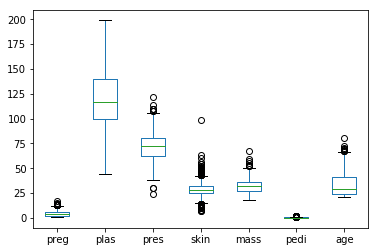

In [7]:
df.plot(kind='box')
plt.show()

Statistička funkcija koja se najčešće koristi za utvrđivanje outlier-a je z-score. Z-skor pojedinačne vrednosti je mera njenog odstupanja od prosečne vrednosti, u kontekstu standardne devijacije. Uobičajeno se outlier-ima smatraju podaci čiji je z-skor manji od -3 ili veći od 3.
Prikaz z-score vrednosti svih vrednosti određene veličine se vrši na sledeći način.

In [8]:
from scipy import stats
z=stats.zscore(df['mass'])
print(z)

[ 0.16661938 -0.85219976 -1.33250021 -0.63388137  1.5493025  -0.99774535
 -0.21179916  0.41404689 -0.28457195 -0.02258989  0.74880175  0.80701998
 -0.77942697 -0.34279019 -0.96863623 -0.35734475  1.9422756  -0.41556299
  1.57841162  0.31216497  0.99622925  0.42860145  1.06900205 -0.50289034
  0.60325616 -0.1972446   1.01078381 -1.34705477 -1.49260037  0.23939218
  0.5159288  -0.1244718  -1.11418183 -1.82735523 -0.70665417 -1.2306183
  0.10840114  0.06473747  0.8361291   0.67602895  0.22483762  1.12722029
 -1.41982757  1.88405736 -0.73576329  1.38920235 -0.40100843 -0.64843593
  0.96712013 -0.02258989 -1.90012802 -1.20150918 -1.17240006  0.18117394
  0.32671953 -1.37616389  0.76335631  2.08782119  1.17088396  1.31642956
 -0.02258989  0.06473747 -1.08507271 -1.02685447  0.05018291 -0.50289034
  0.00651923  1.49108427 -1.8710189  -0.5174449   0.06473747 -0.56110858
  1.59296618  0.38493777 -0.06625357 -1.12873639  0.02107379  0.76335631
  1.56385706 -1.08507271 -1.46349125 -0.02258989 -0.

Tri moguća pristupa za tretman outlier-a su:
- Zamena vrednosti outlier-a prosečnom vrednošću ili nekom drugom statistički značajnom vrednošću.
- Zamena vrednosti outlier-a nedostajućom vrednošću.
- Brisanje vrsti u kojima postoji vrednost neke veličine koja se smatra outlier-om

Izmena vrednosti koje se smatraju outlier-ima se može vršiti metodom grupne manipulacije. Kod dole vrši zamenu vrednosti outlier-a veličine mass, prosečnim vrednostima te veličine. Alternativa ovom pristupu je zamena outlier-a nedostajućim vrednostima (np.nan), a onda potom primena nekog od pristupa za imputiranje nedostajućih podataka.

In [9]:
df.loc[np.abs(stats.zscore(df['mass']))>3, 'mass']=df['mass'].mean()

U slučaju ukoliko je izabrana strategija tretmana outlier-a - brisanje vrsti, moguće je za to koristiti kod sličaj kodu u primeru dole. Izvršenjem koda u primeru se vrši uklanjanje svih vrsti skupa podataka u kojima se vrednost veličine skin smatra outlier-om. Očigledno, dve vrednosti su prepoznate kao outlier-i (skup podataka inicijalno ima 768 vrsti).

In [10]:
df=df[np.abs(stats.zscore(df['skin']))<=3]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 0 to 767
Data columns (total 8 columns):
preg     764 non-null float64
plas     764 non-null float64
pres     764 non-null float64
skin     764 non-null float64
mass     764 non-null float64
pedi     764 non-null float64
age      764 non-null int64
class    764 non-null object
dtypes: float64(6), int64(1), object(1)
memory usage: 53.7+ KB


Važno je napomenuti da značaj outlier-a raste sa brojem podataka u skupu. Ukoliko je broj podataka u skupu relativno mali, outlier-i se ne smeju smatrati statistički ne-značajnim. S obzirom da je broj podataka u skupu za predviđanje dijabetesa mali (naročito kod veličine insu), iako su oni utvrđeni na box dijagramu, zamenjivanje outlier-a nedostajućim vrednostima se u ovom slučaju ne preporučuje. Uklanjanjem celih redova u kojima su utvrđeni outlier-i nekih veličina, iako se time smanjuje iako mali skup podataka, mogu se dobiti dobri rezultati. Na taj način se uzorak smanjuje, ali on postaje statistički značajniji.

## Transformacija zakošenih veličina

Oblik raspodele vrednosti veličina može biti značajan za izbor algoritma mašinskog učenja. Na primer, normalna raspodela vrednosti veličina ukazuje na moguće dobre rezultate primene tzv. parametarskih algoritama, npr. logističke regresije. U analizi raspodele, važno je uočiti i eksponencijalnu raspodelu neke veličine jer se njene vrednosti mogu transformisati tako da se dobije normalna raspodela.

Kao što je ranije pokazano, oblik raspodele se može utvrditi analizom vrednosti zakošenosti (korišćenje metode skew() DataFrame objekta) ili vizuelnom interpretacijom histograma.

In [11]:
df.skew()

preg    1.018349
plas    0.534620
pres    0.224242
skin    0.199824
mass    0.320177
pedi    1.808356
age     1.127218
dtype: float64

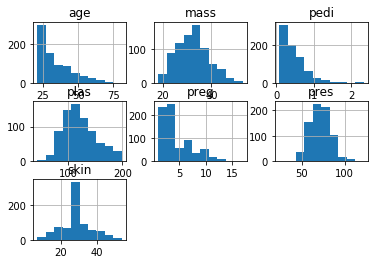

In [12]:
df.hist()
plt.show()

Obe ove metode pokazuju postojanje raspodele veličina mass, plas, pres i skin bliske normalnoj, i raspodele veličina age, preg i pedi bliske eksponencijalnoj.
Transformacija zakošenih veličina se može izvršiti primenom logaritamske ili tzv. boxcox funkcije. Dole su prikazani histogrami koji ilustruju raspodelu veličine pedi, nakon logaritamske transformacije i veličine preg, nakon box-cox transformacije.

Važno je napomenuti da se logaritamska ili boxcox transformacija mogu primeniti samo ukoliko su među podacima samo pozitivni brojevi. Ukoliko ima negativnih brojeva, moguće je prethodno uraditi transformaciju transliranjem, odnosno dodavanjem absolutne vrednosti minimuma svakoj vrednosti veličine.

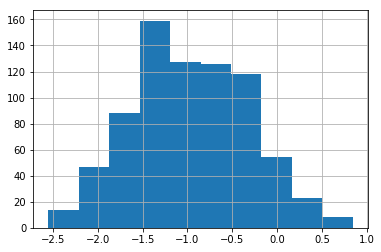

In [13]:
newpedi=np.log(df['pedi'])
newpedi.hist()
plt.show()

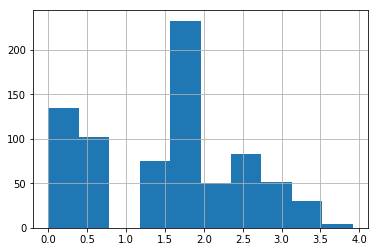

In [14]:
from scipy import stats

newage=pd.Series(stats.boxcox(df['preg'])[0])
newage.hist()
plt.show()

Konačno, vrši se logaritamska transformacija veličina pedi i preg.

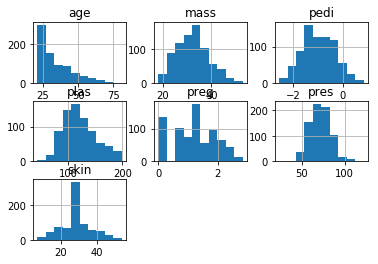

In [15]:
df['pedi']=np.log(df['pedi'])
df['preg']=np.log(df['preg'])
df.hist()
plt.show()

Da podsetimo, transformacijom zakošenih veličina (npr. logaritamskom transformacijom), smanjuje se uticaj outlier-a na model.

## Skaliranje: normalizacija i standardizacija

Skaliranje podrazumeva svođenje veličine iz inicijalnog u zadati opseg. Na taj način, sve vrednosti jedne veličine se transformišu, pri čemu raspodela ostaje ista, a menja se samo interval raspodele. U praksi se radi pripreme podataka primenjuje jedan od dva načina skaliranja:
- Normalizacija. Skaliranje svih podataka izabrane veličine u interval (0,1)
- Standardizacija. Skaliranje svih podataka izabrane veličine, tako da srednja vrednost nakon transformacije dobije vrednost 0, a standardna devijacija - 1. Standardizacijom se svaka vrednost zamenjuje njenim z-skorom.

Skaliranjem se rešavaju problemi do kojih može doći usled velikih razlika u regionima vrednosti različitih veličina. Svođenjem svih veličina u isti region skaliranjem, optimizuje se proces učenja u slučajevima kada se koriste algoritmi zasnovani na linearnoj regresiji, a popravlja se i tačnost predviđanja kod KNN algoritma i u neuronskim mrežama. U ova dva slučaja, priprema podataka skaliranjem je obavezna. Skaliranje je nepotrebno ukoliko se planira korišćenje algoritama koji se zasnivaju na stablima odlučivanja.

Analizom minimuma i maksimuma podataka u skupu za predviđanje dijagnoze dijabetesa, lako se uočavaju razlike u regionima raspodela veličina i utvrđuje potreba za skaliranjem podataka.

In [16]:
df.describe()

,preg,plas,pres,skin,mass,pedi,age
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,1.239515,121.456806,71.899215,28.599476,32.263698,-0.964987,33.227749
std,0.744715,30.276350,12.305059,8.227232,6.529859,0.641018,11.737092
min,0.000000,44.000000,24.000000,7.000000,18.200000,-2.551046,21.000000
25%,0.693147,99.000000,62.000000,25.000000,27.500000,-1.416760,24.000000
50%,1.386294,117.000000,72.000000,28.000000,32.300000,-0.994252,29.000000
75%,1.791759,140.000000,80.000000,32.000000,36.425000,-0.477639,41.000000
max,2.833213,199.000000,122.000000,54.000000,52.900000,0.845439,81.000000


Radi demonstracije, veličine preg i plas će biti normalizovane, a pres, skin i mass - standardizovane. Dole su navedeni primeri koda koji vrše željene transformacije.

In [17]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0, 1))
df['preg']=mms.fit_transform(df[['preg']])
df['plas']=mms.fit_transform(df[['plas']])

In [18]:
from sklearn.preprocessing import scale
df['pres']=scale(df['pres'])
df['skin']=scale(df['skin'])
df['mass']=scale(df['mass'])

Nove vrednosti karakterističnih statističkih veličina podataka, nakon transformacije, ukazuju na uspešno izvršenu normalizaciju i standardizaciju. 

In [19]:
df.describe()

,preg,plas,pres,skin,mass,pedi,age
count,764.000000,764.000000,7.640000e+02,7.640000e+02,7.640000e+02,764.000000,764.000000
mean,0.437494,0.499721,-2.809707e-16,9.583666e-17,-4.080506e-16,-0.964987,33.227749
std,0.262852,0.195331,1.000655e+00,1.000655e+00,1.000655e+00,0.641018,11.737092
min,0.000000,0.000000,-3.895194e+00,-2.627084e+00,-2.155163e+00,-2.551046,21.000000
25%,0.244651,0.354839,-8.050103e-01,-4.377942e-01,-7.300033e-01,-1.416760,24.000000
50%,0.489301,0.470968,8.195927e-03,-7.291264e-02,5.562956e-03,-0.994252,29.000000
75%,0.632412,0.619355,6.587609e-01,4.135961e-01,6.376902e-01,-0.477639,41.000000
max,1.000000,1.000000,4.074227e+00,3.089394e+00,3.162368e+00,0.845439,81.000000


## Uvođenje polinomijalnih veličina

Uvođenjem polinomijalnih veličina, omogućava se rešenje nelinearnih problema (odnosno, nelinearne zavisnosti između ulaznih i izlazne veličine), primenom linearnih modela, npr. linearne regresije. Primer linearne funkcije je funkcija y=a+a1x1+a2x2. Ovom funkcijom se može aproksimirati zavisnost izlazne veličine y, od dve ulazne (x1, x2). Ova zavisnost je linearna. Pošto se u praksi ovakva aproksimacija najčešće smatra nedovoljnom (retki su primeri linearne zavisnosti u problemima mašinskog učenja), uvode se dodatne ulazne veličine, npr x1*x2, x1^2, x2^2, x1^3, x2^3, x1*x2^2, x2*x1^2. 

Na ovaj način, omogućava se kreiranje kompleksnog modela, koji je i dalje linearan (svaka dodatna veličina se množi novim koeficijentom). U Pythonu, uvođenje polinomijalnih veličina se vrši primenom funkcije PolynomialFeatures, na način koji je prikazan dole. Napominje se da se izlazna veličina ne uzima u obzir tom prilikom.

In [20]:
from sklearn.preprocessing import PolynomialFeatures

pf=PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X=df.values[:,:7]
X=pf.fit_transform(X)
dfpf=pd.DataFrame(X, columns=pf.get_feature_names(df.columns))
dfpf['class']=df['class']
dfpf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 36 columns):
preg         764 non-null float64
plas         764 non-null float64
pres         764 non-null float64
skin         764 non-null float64
mass         764 non-null float64
pedi         764 non-null float64
age          764 non-null float64
preg^2       764 non-null float64
preg plas    764 non-null float64
preg pres    764 non-null float64
preg skin    764 non-null float64
preg mass    764 non-null float64
preg pedi    764 non-null float64
preg age     764 non-null float64
plas^2       764 non-null float64
plas pres    764 non-null float64
plas skin    764 non-null float64
plas mass    764 non-null float64
plas pedi    764 non-null float64
plas age     764 non-null float64
pres^2       764 non-null float64
pres skin    764 non-null float64
pres mass    764 non-null float64
pres pedi    764 non-null float64
pres age     764 non-null float64
skin^2       764 non-null float64
skin mass  

In [21]:
dfpf.head()

,preg,plas,pres,skin,mass,pedi,age,preg^2,preg plas,preg pres,...,skin mass,skin pedi,skin age,mass^2,mass pedi,mass age,pedi^2,pedi age,age^2,class
0,0.632412,0.670968,0.008196,0.778478,0.204779,-0.466809,50.0,0.399946,0.424328,0.005183,...,0.159416,-0.363400,38.923886,0.041934,-0.095593,10.238941,0.217910,-23.340437,2500.0,tested_positive
1,0.000000,0.264516,-0.479728,0.048715,-0.867922,-1.046969,31.0,0.000000,0.000000,-0.000000,...,-0.042280,-0.051003,1.510151,0.753289,0.908687,-26.905582,1.096144,-32.456041,961.0,tested_negative
2,0.733952,0.896774,-0.642369,-0.072913,-1.373624,-0.397497,32.0,0.538685,0.658189,-0.471468,...,0.100155,0.028983,-2.333204,1.886842,0.546011,-43.955963,0.158004,-12.719902,1024.0,tested_positive
3,0.000000,0.290323,-0.479728,-0.681049,-0.638058,-1.789761,21.0,0.000000,0.000000,-0.000000,...,0.434548,1.218915,-14.302021,0.407117,1.141971,-13.399209,3.203246,-37.584991,441.0,tested_negative
4,0.489301,0.600000,-2.594064,0.778478,1.660587,0.827678,33.0,0.239416,0.293581,-1.269278,...,1.292730,0.644329,25.689765,2.757550,1.374432,54.799375,0.685051,27.313376,1089.0,tested_positive


## Klasterovanje i binarizacija

Klasterovanje predstavlja transformaciju kontinualne veličine u veličinu tipa kategorije, odnosno nominalnu ili češće, ordinalnu veličinu (jer se klase određuju na osnovu vrednosti kontinualne veličine). Poseban slučaj klasterovanja je binarizacija, kojom se kontinualna veličina transformiše u veličinu tipa kategorije, sa samo dve moguće vrednosti.

Klasterovanje i binarizacija se vrše u situacijama u kojima precizna vrednost kontinualne ulazne veličine nema konkretan značaj za vrednost izlazne veličine. Na primer, avio-kompanije može precizirati različiti tretman prtljaga putnika prema njegovoj težini: prtljag težine do 10kg (ukoliko je određenih dimenzija) se može uneti u kabinu aviona, od 10kg do 23kg, moguće ga je čekirati bez naplate; čekiranje prtljaga težeg od 23kg se naplaćuje.

Takođe, klasterovanjem ili binarizacijom izlazne veličine, problem regresije se može svesti na problem klasifikacije.

Godine starosti osobe predstavljaju kontinualnu veličinu koja se veoma često, u rešavanju različitih problema transformiše u veličinu tipa kategorije. Na slici dole je prikazana raspodela vrednosti veličine godina starosti u skupu podataka za predviđanje dijabetesa.

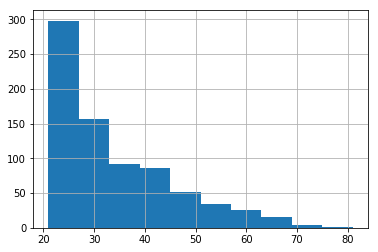

In [22]:
df['age'].hist()
plt.show()

Kod prikazan dole ilustruje način transformacije ove veličine u novu veličinu tipa kategorije, čije su moguće vrednosti: -25, 25-35, 35-45, 45-55, 55-65, 65-. U ovom slučaju se koristi funkcija cut pandas paketa. Kao argumenti, dostavljaju se granične vrednosti intervala klasterovanja i nazivi klastera, odnosno buduće vrednosti veličine tipa kategorije.

In [23]:
bin_ranges=[0, 25, 35, 45, 55, 65, 120]
bin_names=['-25', '25-35', '35-45','45-55','55-65','65+']
df['ageclass']=pd.cut(df['age'], bins=bin_ranges, labels=bin_names)
df['ageclass']=df['ageclass'].astype('category')

Raspodela novih vrednosti je prikazana dole.

In [24]:
df.groupby('ageclass').size()

ageclass
-25      265
25-35    230
35-45    152
45-55     68
55-65     36
65+       13
dtype: int64

Kod gore predstavlja demonstraciju načina na koji se numerička veličina transformiše u veličinu nominalnog tipa (zapravo od postojeće numeričke veličine se kreira nova veličina nominalnog tipa). U ovom konkretnom slučaju, godine starosti bi morale biti ordinalnog tipa, a vrednosti će biti celobrojne. Zato, izvršava se sledeći kod.

In [25]:
bin_ranges=[0, 25, 35, 45, 55, 65, 120]
bin_names=[1, 2, 3,4,5,6]
df['age']=pd.cut(df['age'], bins=bin_ranges, labels=bin_names)
df['age']=df['age'].astype('int')

## Kodiranje

Prilikom rešavanja problema klasifikacije i regresije, poželjno je da vrednosti u jednom skupu podataka budu numeričke. Na primer, neki algoritmi ne mogu da rade sa tekstualnim ili podacima tipa kategorije (kod kojih su vrednosti kategorija tekstualnog tipa). U tim slučajevima, neophodno je u postupke pripreme podataka uključiti i kodiranje veličina. Dva osnovna postupka za kodiranje veličina su:
- Kodiranje labelama (label encoding) - veličine tipa kategorije (nominalni tip) se zamenjuju brojevima, kodovima odgovarajućih klasa.
- Binarno kodiranje (one hot encoding) - za jednu nominalnu veličinu se formira onoliko novih veličina koliko ima klasa u podacima, a vrednosti su binarne.

Najjednostavniji način za binarno kodiranje podrazumeva korišćenje funkcije get_dummies pandas paketa. Kod dole ilustruje način njenog korišćenja

In [26]:
df_processed = pd.get_dummies(df, prefix_sep="_",columns=['ageclass'])
df_processed.head()

,preg,plas,pres,skin,mass,pedi,age,class,ageclass_-25,ageclass_25-35,ageclass_35-45,ageclass_45-55,ageclass_55-65,ageclass_65+
0,0.632412,0.670968,0.008196,0.778478,0.204779,-0.466809,4,tested_positive,0,0,0,1,0,0
1,0.000000,0.264516,-0.479728,0.048715,-0.867922,-1.046969,2,tested_negative,0,1,0,0,0,0
2,0.733952,0.896774,-0.642369,-0.072913,-1.373624,-0.397497,2,tested_positive,0,1,0,0,0,0
3,0.000000,0.290323,-0.479728,-0.681049,-0.638058,-1.789761,1,tested_negative,1,0,0,0,0,0
4,0.489301,0.600000,-2.594064,0.778478,1.660587,0.827678,2,tested_positive,0,1,0,0,0,0


In [28]:
df_processed.to_csv('kurs_diabetes_prep.csv')